In [876]:
import numpy as np
import random
import math
from matplotlib import pyplot as plt
import warnings

warnings.filterwarnings('ignore')


In [877]:
# la bound
# lb bound
# ht bound


In [878]:
def gen_deadline(exec_time, period):
    # [a,b]
    b = 1.2 * period
    if(exec_time < 10):
        a = exec_time
    elif(exec_time < 100 and exec_time >= 10):
        a = 2*exec_time
    elif(exec_time < 1000 and exec_time >= 100):
        a = 3*exec_time
    else:
        a = 4*exec_time

    a = 0.7*period
    return a+random.random()*(b-a)


def gen_tasksets(utilizations, periods):

    def trunc(x, p):
        return int(x * 10 ** p) / float(10 ** p)
    # [[print(ui) for ui, pi in zip(us, ps)]
    #         for us, ps in zip(utilizations, periods)]
    return np.array([[[trunc(ui * pi, 6), trunc(pi, 6), trunc(gen_deadline(trunc(ui * pi, 6), trunc(pi, 6)), 6)] for ui, pi in zip(us, ps)]
            for us, ps in zip(utilizations, periods)])


In [879]:
def custom_period(n, nsets,max_,min_=0):
	max_power = np.log(max_)


	intervals = np.arange(0,np.floor(max_power)+1)
	intervals = np.append(intervals, max_power)
	#print(intervals)
	task_pp = ((n-1)//(len(intervals)-1))
	
	task_lf = np.mod(n-1, len(intervals)-1).astype(int)
	#print(task_lf,task_pp)
	periods = np.zeros((nsets, n))
	for i in range(nsets):
		for j in range(len(intervals)-1):
			if(j<task_lf):
				periods[i][j*task_pp+j:(j+1)*task_pp+j+1] = np.random.uniform(low=np.exp(intervals[j]), high=np.exp(intervals[j+1]), size=task_pp+1)
			else:
				periods[i][j*task_pp+task_lf:(j+1)*task_pp+task_lf] = np.random.uniform(low=np.exp(intervals[j]), high=np.exp(intervals[j+1]), size=task_pp)
	periods[0:nsets,-1] =max_ 
	return periods


In [880]:
custom_period(14,2,100)

array([[  2.6908714 ,   2.04666139,   2.41464161,   4.09273611,
          6.49915487,   3.23987577,  14.88413258,   7.67560064,
         12.79932038,  46.65191824,  48.68747663,  73.89237685,
         71.82634644, 100.        ],
       [  1.27459968,   1.59074723,   1.51420573,   6.37476289,
          5.67396282,   2.96761992,  17.07611681,  15.49457168,
          9.42209619,  21.43877699,  34.78055865,  84.91608362,
         62.20966596, 100.        ]])

In [881]:
def UUniFastDiscard(n, u, nsets):
    sets = []
    while len(sets) < nsets:
        # Classic UUniFast algorithm:
        utilizations = []
        sumU = u
        for i in range(1, n):
            nextSumU = sumU * random.random() ** (1.0 / (n - i))
            utilizations.append(sumU - nextSumU)
            sumU = nextSumU
        utilizations.append(sumU)

        # If no task utilization exceeds 1:
        if all(ut <= 1 for ut in utilizations):
            sets.append(utilizations)

    return sets

    
def gen_uunifastdiscard(nsets, u, n):
    return UUniFastDiscard(n, u, nsets)

In [882]:
def get_taskset(nsets, n):
	u = 0.9
	#n = 1000
	utilizations = gen_uunifastdiscard(nsets, u, n)
	periods = custom_period(n, nsets, 1000, 10)
	return gen_tasksets(utilizations, periods)

	

In [883]:
taskset = get_taskset(1, 8)
taskset

array([[[2.68898000e-01, 2.19575500e+00, 2.22140500e+00],
        [5.57180000e-02, 4.92453400e+00, 4.70885700e+00],
        [6.78404000e-01, 1.70416270e+01, 1.32300340e+01],
        [2.59223300e+00, 2.13113600e+01, 2.23233690e+01],
        [9.89611100e+00, 9.22343830e+01, 8.39917680e+01],
        [8.99614110e+01, 3.69098406e+02, 4.14098721e+02],
        [1.33842659e+02, 9.02449676e+02, 8.94372247e+02],
        [1.05441656e+02, 1.00000000e+03, 1.04660643e+03]]])

In [884]:
taskset[0]

array([[2.68898000e-01, 2.19575500e+00, 2.22140500e+00],
       [5.57180000e-02, 4.92453400e+00, 4.70885700e+00],
       [6.78404000e-01, 1.70416270e+01, 1.32300340e+01],
       [2.59223300e+00, 2.13113600e+01, 2.23233690e+01],
       [9.89611100e+00, 9.22343830e+01, 8.39917680e+01],
       [8.99614110e+01, 3.69098406e+02, 4.14098721e+02],
       [1.33842659e+02, 9.02449676e+02, 8.94372247e+02],
       [1.05441656e+02, 1.00000000e+03, 1.04660643e+03]])

In [885]:
taskset_paper = np.array([[6000, 18000, 31000], [2000, 9000, 9800], [1000, 12000, 17000], [
                         90, 3000, 4200], [8, 78, 96], [2, 16, 12], [10, 120, 280], [26, 160, 660]])


In [886]:
def procDemand_func(taskset,t):
    deadlines = taskset[:,1]
    periods = taskset[:,2]
    wcet = taskset[:,0]

    h_t = np.sum(np.maximum(0, 1 + np.floor((t-deadlines)/(periods)))*wcet)

    return h_t

In [887]:
t = 16974
ht = procDemand_func(taskset_paper, t)
print(ht)

8890.0


In [888]:
print(taskset)

[[[2.68898000e-01 2.19575500e+00 2.22140500e+00]
  [5.57180000e-02 4.92453400e+00 4.70885700e+00]
  [6.78404000e-01 1.70416270e+01 1.32300340e+01]
  [2.59223300e+00 2.13113600e+01 2.23233690e+01]
  [9.89611100e+00 9.22343830e+01 8.39917680e+01]
  [8.99614110e+01 3.69098406e+02 4.14098721e+02]
  [1.33842659e+02 9.02449676e+02 8.94372247e+02]
  [1.05441656e+02 1.00000000e+03 1.04660643e+03]]]


In [889]:
taskset_paper = np.array([[6000, 18000, 31000], [2000, 9000, 9800], [1000, 12000, 17000], [90, 3000, 4200], [8, 78, 96], [2, 16, 12], [10, 120, 280], [26, 160, 660]])

In [890]:
def La_bound(taskset):
	"""
	Compute La calculations for the La bound
	
	"""
	wcet = taskset[:,0]
	deadlines = taskset[:,1]
	periods = taskset[:,2]
	utilizations = wcet/periods
	total_utilization = np.sum(utilizations)
	La = np.maximum(np.max(deadlines),np.sum((periods-deadlines)*utilizations)/(1-total_utilization))
	return La


In [891]:
taskset = get_taskset(1, 25)
la = La_bound(taskset)
print(la)

1.610523


In [892]:
La = La_bound(taskset_paper)
taskset_paper[:,0]/taskset_paper[:,1]
print(La)

18000.0


In [893]:
def Lb_bound(taskset):
    wcet = taskset[:,0]
    deadlines = taskset[:,1]
    periods = taskset[:,2]
    w0 = np.sum(wcet)
    a = w0
    b = np.sum(np.ceil(np.round((a/periods), 1)*wcet))
    while a != b and (((a**2 - b**2) > 0.0000001 or (b**2 - a**2) > 0.0000001)):
        #if (a**2 - b**2 > 0 and (np.sqrt(a**2 - b**2) > 0.0001)) or (a**2 - b**2 < 0 and (np.sqrt(b**2 - a**2) > 0.0001)):
        a = b
        b = np.round(np.sum(np.ceil(a/periods)*wcet), 1)
        
    Lb = b
    
    return Lb

In [894]:
Lb = Lb_bound(taskset_paper)
print(Lb)

16984.0


In [895]:
deadlines = taskset_paper[:, 1]
d_min = np.min(deadlines)
print(d_min)

16


In [896]:
def get_dmin(deadliness, L):
    return np.min(deadliness)
    
    

In [897]:
deadlines = taskset_paper[:, 1]
L = np.minimum(La, Lb)
d_min = get_dmin(deadlines, L)
print(d_min)


16


In [898]:
taskset_paper.shape

(8, 3)

In [899]:
def get_max_abs_deadline(taskset, L):
    n = taskset.shape[0]
    abs_deadlines = []
    
    for i in range(n):
        p = 0
        j = 0
        Ti = taskset[i][2]
        Di = taskset[i][1]
        while p < L:
            j += 1
            q = p
            p = j*Ti + Di
            
        abs_deadlines.append(q)
    return np.max(abs_deadlines)
    

In [900]:
L = 16984
t = get_max_abs_deadline(taskset_paper, L)

print(t)

16974


In [901]:
def get_max_di(taskset, t):
    n = taskset.shape[0]
    d_max = 0
    
    for j in range(n):
        if taskset[j][1] < t:
            d = np.floor((t - taskset[j][1])/taskset[j][2])*taskset[j][2] + taskset[j][1]
            if d == t:
                d = d - taskset[j][2]
            if d > d_max:
                d_max = d
                
    return d_max
    
    

In [914]:
def La_starbound(taskset):
	"""
	Compute La calculations for the La bound
	
	"""
	wcet = taskset[:, 0]
	deadlines = taskset[:, 1]
	periods = taskset[:, 2]
	utilizations = wcet/periods
	#print("deadlines", deadlines, "periods", periods, "utilizations", utilizations)
	#print(deadlines, periods, utilizations)
	total_utilization = np.sum(utilizations)
	#print("total utilization : " + str(total_utilization))
	# print(np.sum((periods-deadlines)*utilizations)/(1-total_utilization))
	#La = np.maximum(np.max(deadlines),np.max((periods-deadlines))*(total_utilization/(1-total_utilization)))
	print(np.max(deadlines))
	La = np.maximum(np.max(deadlines-periods),
	                np.sum((periods-deadlines)*utilizations)/(1-total_utilization))
	return La


In [915]:
def La_starcalculations(taskset):
	La_star = La_starbound(taskset)
	wcet = taskset[:, 0]
	deadlines = taskset[:, 1]
	periods = taskset[:, 2]
	tot_abs_deadlines = 0
	for job in taskset:
		job_abs_deadline = 0
		if (job[1] <= job[2]):
			job_abs_deadline = np.floor((La_star)/job[2])
			if (job_abs_deadline*job[2]+job[1] <= La):
				job_abs_deadline = job_abs_deadline+1
		else:
			job_abs_deadline = np.floor((La_star)/job[2])
		tot_abs_deadlines += job_abs_deadline
		print(job_abs_deadline, job[1], job[2])
	return tot_abs_deadlines


In [902]:
def La_boudcalculations(taskset):
	La = La_bound(taskset)
	#print("La : " + str(La))
	wcet = taskset[:, 0]
	deadlines = taskset[:, 1]
	periods = taskset[:, 2]
	tot_abs_deadlines = 0
	for job in taskset:
		job_abs_deadline = 0
		if (job[1] <= job[2]):
			job_abs_deadline = np.floor((La)/job[2])
			if (job_abs_deadline*job[2]+job[1] <= La):
				job_abs_deadline = job_abs_deadline+1
		else:
			job_abs_deadline = np.floor((La)/job[1])
		tot_abs_deadlines += job_abs_deadline
		#print(job_abs_deadline, job[1], job[2])
	return tot_abs_deadlines


In [903]:
def Lb_boudcalculations(taskset):
	Lb = Lb_bound(taskset)
	wcet = taskset[:, 0]
	deadlines = taskset[:, 1]
	periods = taskset[:, 2]
	tot_abs_deadlines = 0
	#print(Lb)
	for job in taskset:
		job_abs_deadline = 0
		if (job[1] <= job[2]):
			job_abs_deadline = np.floor((Lb)/job[2])
			if (job_abs_deadline*job[2]+job[1] <= La):
				job_abs_deadline = job_abs_deadline+1
		else:
			job_abs_deadline = np.floor((Lb)/job[2])
		tot_abs_deadlines += job_abs_deadline
		#print(job_abs_deadline, job[1], job[2])
	return tot_abs_deadlines


In [904]:
def qpa(taskset):
    
    La = La_bound(taskset)
    print("La : " + str(La))
    Lb = Lb_bound(taskset)
    print("Lb : " + str(Lb))
    L = np.minimum(La, Lb)
    print("L : " + str(L))
    
    t = get_max_abs_deadline(taskset, L)
    #print("t : " + str(t))
    h_t = procDemand_func(taskset, t)
    #print("h(t) : " + str(h_t))

    total_cal = 0
    
    while h_t <= t and h_t > d_min:
        h_t = procDemand_func(taskset, t)
        total_cal += 1

        print("t : " + str(t))
        print("h(t) : " + str(h_t))
        if h_t < t:
            t = h_t
        else:
            d_max = get_max_di(taskset, t)
            t = d_max
    
    if h_t <= d_min:
        print("Task set is schedulable")
        print("total calculations : " + str(total_cal))
        return total_cal
    else:
        print("Task set is not schedulable")
        

    

In [905]:
qpa(taskset_paper)

La : 18000.0
Lb : 16984.0
L : 16984.0
t : 16974
h(t) : 8890.0
t : 8890.0
h(t) : 3080.0
t : 3080.0
h(t) : 1098.0
t : 1098.0
h(t) : 362.0
t : 362.0
h(t) : 118.0
t : 118.0
h(t) : 26.0
t : 26.0
h(t) : 2.0
Task set is schedulable
total calculations : 7


7

In [906]:
taskset_paper = np.array([[6000,18000,31000],[2000,9000,9800],[1000,12000,17000],[90,3000,4200],[8,78,96],[2,16,12],[10,120,280],[26,160,660]])

In [907]:
taskset = get_taskset(1, 5)
#taskset
taskset = np.array(taskset[0])
qpa(taskset)


La : 1000.0
Lb : 409.1
L : 409.1
t : 408.460933
h(t) : 330.60862000000003
t : 330.60862000000003
h(t) : 264.937403
t : 264.937403
h(t) : 212.91638899999998
t : 212.91638899999998
h(t) : 168.690935
t : 168.690935
h(t) : 129.697189
t : 129.697189
h(t) : 101.079102
t : 101.079102
h(t) : 77.364557
t : 77.364557
h(t) : 56.542030000000004
t : 56.542030000000004
h(t) : 44.684607
t : 44.684607
h(t) : 31.510105
t : 31.510105
h(t) : 23.550462
t : 23.550462
h(t) : 12.169041
Task set is schedulable
total calculations : 12


12

In [908]:
x = [2, 9]
# x.append(np.random.randint(1, 100))
# print(x)

qpa_y = []
for i in x:
	print(i)
	taskset = get_taskset(1, int(i))
	qpa_y.append(qpa(taskset[0]))


2
La : 1000.0
Lb : 767.3
L : 767.3
t : 765.4944449999999
h(t) : 441.50152799999995
t : 441.50152799999995
h(t) : 253.297351
t : 253.297351
h(t) : 145.752107
t : 145.752107
h(t) : 83.489071
t : 83.489071
h(t) : 48.112345999999995
t : 48.112345999999995
h(t) : 26.886311
t : 26.886311
h(t) : 14.150689999999999
Task set is schedulable
total calculations : 7
9
La : 1000.0
Lb : 565.5
L : 565.5
t : 565.251942
h(t) : 349.783814
t : 349.783814
h(t) : 221.82924699999998
t : 221.82924699999998
h(t) : 125.621674
t : 125.621674
h(t) : 66.394369
t : 66.394369
h(t) : 37.018529
t : 37.018529
h(t) : 11.120434
Task set is schedulable
total calculations : 6


In [909]:
def qpa(taskset):

    La = La_bound(taskset)
    #print("La : " + str(La))
    #Lb = Lb_bound(taskset)
    #print("Lb : " + str(Lb))
    L = La#np.minimum(La, Lb)
    #print("L : " + str(L))

    t = get_max_abs_deadline(taskset, L)
    #print("t : " + str(t))
    h_t = procDemand_func(taskset, t)
    #print("h(t) : " + str(h_t))

    total_cal = 0

    while h_t <= t and h_t > d_min:
        h_t = procDemand_func(taskset, t)
        total_cal += 1

        #print("t : " + str(t))
        #print("h(t) : " + str(h_t))
        if h_t < t:
            t = h_t
        else:
            d_max = get_max_di(taskset, t)
            t = d_max

    if h_t <= d_min:
        #print("Task set is schedulable")
        #print("total calculations : " + str(total_cal))
        return total_cal
    else:
        #print("Task set is not schedulable")
        #print("total calculations : " + str(total_cal))
        return total_cal


10 0
513
20 1
521
40 2
494
80 3
459
160 4
456
320 5
413
640 6
377
1280 7
346
[10.590643274853802, 11.614203454894433, 11.923076923076923, 11.583877995642702, 11.831140350877194, 11.961259079903147, 12.037135278514588, 12.127167630057803]


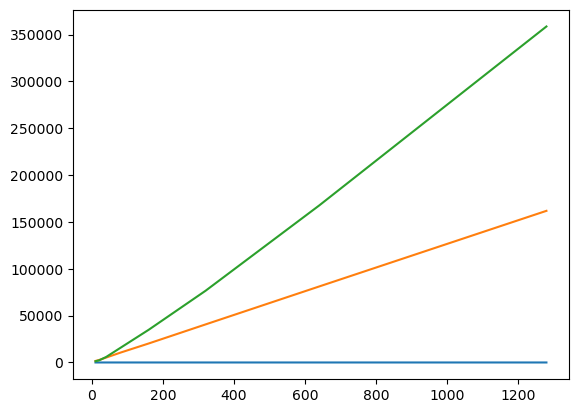

In [910]:
x = [10, 20, 40, 80, 160, 320, 640, 1280]
q = [0] * len(x)
la_cal = [0] * len(x)
lb_cal = [0] * len(x)
l = 0

for i in range(len(x)):
        print(x[i],i)
        taskset = get_taskset(1000, int(x[i]))
        total_count =0
        for j in range(len(taskset)):
            task = np.array(taskset[j])
            wcet = task[:, 0]
            deadlines = task[:, 1]
            periods = task[:, 2]
            
            utilizations = np.sum(wcet/np.minimum(periods, deadlines))
            if(utilizations<=1):
                ht_calculated = True
                total_count+=1
            else:
                #print("utilization is greater than 1")
                continue

            #print("utilization : " + str(utilizations))

            q[l] += qpa(task)
            la_cal[l] += La_boudcalculations(task)
            lb_cal[l] += Lb_boudcalculations(task)

        q[l]= q[l]/total_count
        la_cal[l] = la_cal[l]/total_count
        lb_cal[l] = lb_cal[l]/total_count
        print(total_count)
        l += 1

print(q)
plt.plot(x, q)
plt.plot(x, la_cal)
plt.plot(x, lb_cal)


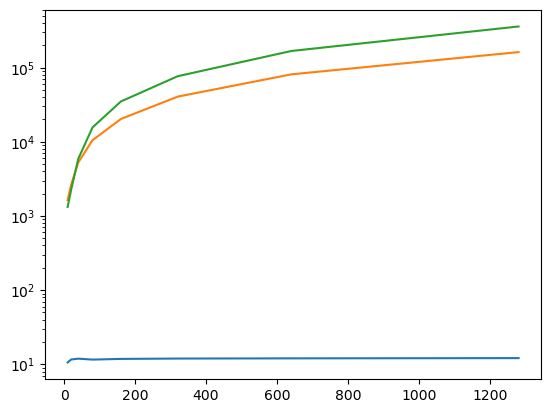

In [913]:
plt.yscale("log")
plt.plot(x, q)
plt.plot(x, la_cal)
plt.plot(x, lb_cal)


## Number of calculations req while doing with La bound

In [911]:
n = 8
taskset = get_taskset(1, n)
taskset = np.array(taskset[0])
La = La_boudcalculations(taskset)
t = int(La) - 1
print("La", La)
print("t", t)
ht_count = 0

while t < La:
    h_t = procDemand_func(taskset, t)
    if h_t > t:
        break
    t -= 1
    ht_count += 1

print(La_boudcalculations(taskset_paper))

La 785.0
t 784
1411.0


## Calculating number of h_t operations for Lb bound

In [912]:
n = 8
taskset = get_taskset(1, n)
taskset = np.array(taskset[0])
Lb = Lb_bound(taskset)
t = int(Lb) - 1
print("Lb", Lb)
print("t", t)
ht_count = 0

while t < Lb:
    h_t = procDemand_func(taskset, t)
    if h_t > t:
        break
    t -= 1
    ht_count += 1

print(ht_count)


Lb 1722.7
t 1721
1722
